# KNN(1)

쉽고 직관적인 분류모델로 알려져있고, 의사결정나무처럼 연속형 종속변수의 회귀예측도 가능.
대부분의 기계학습은 학습데이터를 먼저 학습하여 모델생성 후, 예측데이터에 이를 적용하여 값 도출.
하지만 KNN은 메모리기반 학습방법으로 학습데이터의 별도 학습과정이 없으며 미리 저장되어 있는 학습데이터에다가 예측데이터를 대조함으로써 직접 결과가 도출.

_핵심:가장 가까운 거리에 있는 관측치가 곧 예측하고자 하는 관측치와 동일한 범주_
_= 독립변수들의 값이 비슷하면 범주도 비슷할 것이다._

예시 : 연령과 연 소득에 따른 자차 보유 여부

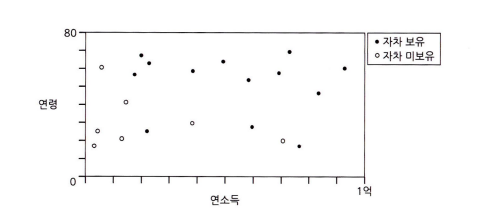

여기에 예측데이터로 3명을 넣어보자. 이 중에서 가장 가까운 거리에 있는 관측치가 곧 예측하고자 하는 관측치와 동일한 범주일 것이라고 판단.

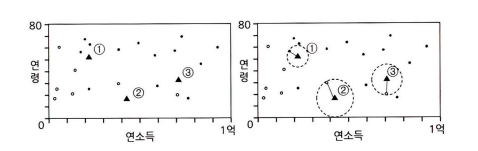

1번관측치는 가장 가까이에 있는 관측치가 검은 점으로 자차보유자이다. 따라서 1번은 자차 보유자로 분류.

이렇게 **하나의 근접한 학습데이터로 분류하는 것이 KNN**

_K는 양의 정수로 통상적으로 10이하로 맞춘다. K는 근접한 이웃의 수_
만약 예시에서 K=3으로 설정한 경우, 가장 가까이에 있는 3개의 학습데이터를 살펴보고 가장 비슷한 범주를 찾는다.

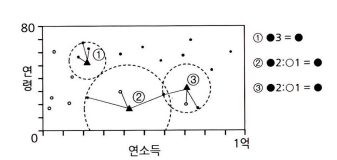

_KNN은 데이터의 지역구조(Local structure)에 민감한 특성을 가지고 있다._
즉, 근접한 과반수의 범주를 따르다 보니 범주의 분포가 편향되어 있을 경우에는 예측 데이터의 관측치들이 빈도 높은 범주로 강하게 쏠리는 단점이 있다. 

**_따라서 K를 잘 설정해주어야 한다._**
- 동률의 범주가 생겨 분류를 할 수 없는 상황을 방지하기 위해 이진 분류의 경우 홀수의 K를 설정하는 것이 좋다. 
- K가 너무 크면 전체 범주의 분포의 영향을 많이 받게 되고 관련이 적은 먼 곳의 데이터가 분류의 영향을 미치게 된다. K가 너무 작으면 이상치의 영향을 많이 받고 패턴이 직관적이지 못하다.

_그럼 멀리 있는 것은 영향력을 적게 받도록 하면 모델의 정확도가 더 높아지지 않을까?_
_= KNN에서는 거리의 가중치를 줄 수 있다._

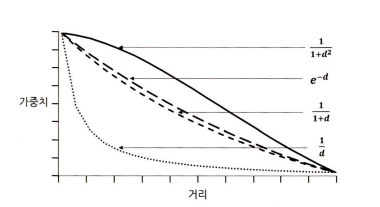

_거리 계산 방법 : 유클리드 거리_
- 거리를 사용하기 떄문에 데이터 정규화나 표준화를 반드시 해줘야한다.

**_최적의 K를 선택하는 방법: 교차검증(Cross Validation)을 하여 오분류율이 가장 낮아지는 K 선택_** <br>
-> Elobow point

### 1.패키지 설치 및 데이터 로드

In [2]:
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_excel(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\6.Support_Vector_Machine\Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### 2. 독립변수 정규화 스케일링 및 학습셋과 테스트셋 생성

In [8]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area', 'Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋 테스트셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# 분리가 잘됐는지 확인
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(540, 6) (360, 6)
(540, 1) (360, 1)


### 3. 기본 KNN 모델 생성 및 정확도 확인

In [9]:
# 모델 생성 및 학습 (n_neighbors=3으로 설정, weights='uniform'으로 가중치 설정X, metric default=minkowski)
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski')
knn.fit(x_train, y_train)

# 모델 정확도 확인
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.9092592592592592
0.8333333333333334


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


> 학습데이터의 정확도 : 0.9092592592592592

> 테스트데이터의 정확도 : 0.8333333333333334


### 4. 최적의 K 찾기

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

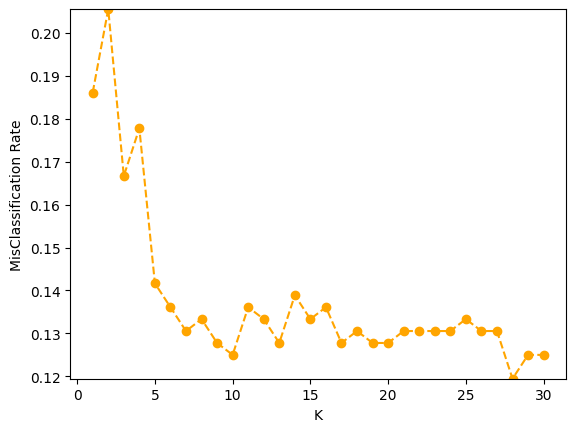

In [11]:
# 이웃 k수를 1~30까지 엘보우 포인트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = [*range(1,31)]

accuracies = []

for k in k_num:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski')
    knn.fit(x_train, y_train)
    accuracies.append(1 - knn.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color='orange')
plt.xlabel('K')
plt.ylabel('MisClassification Rate')
plt.ylim(min(accuracies), max(accuracies))
plt.show()

> K=5 일떄 오분류율(1-score)가 낮아지는 경향을 보인다.

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

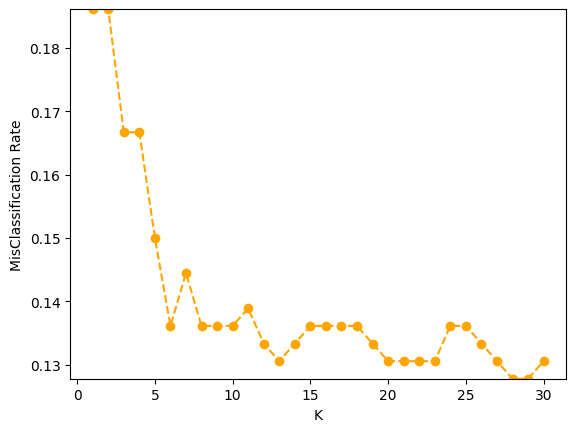

In [12]:
# 이웃 k수를 1~30까지 엘보우 포인트 시각화 (거리 가중치 적용 weights='distance')

# k 수 범위 지정
k_num = [*range(1,31)]

accuracies = []

for k in k_num:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski')
    knn.fit(x_train, y_train)
    accuracies.append(1 - knn.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color='orange')
plt.xlabel('K')
plt.ylabel('MisClassification Rate')
plt.ylim(min(accuracies), max(accuracies))
plt.show()


> 거리 가중치(weights='distance')를 적용한 결과 거리 가중치를 적용하지 않은 모델보다 오분유율이 감소하고 변동성도 줄어든 것을 볼 수 있다.

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

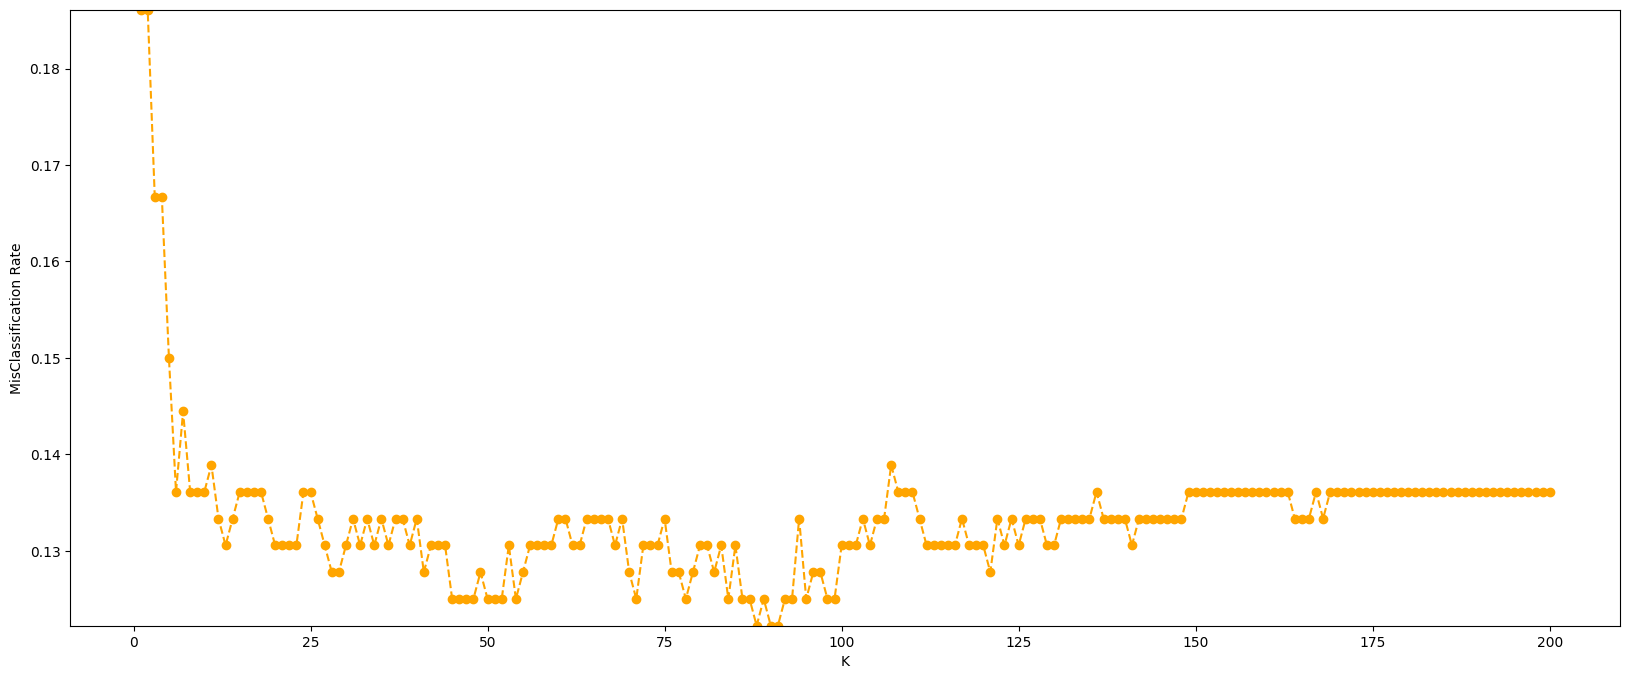

In [14]:
# 이웃 k수를 1~200까지 엘보우 포인트 시각화 (거리 가중치 적용 weights='distance')

# k 수 범위 지정
k_num = [*range(1,201)]

accuracies = []

for k in k_num:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski')
    knn.fit(x_train, y_train)
    accuracies.append(1 - knn.score(x_test, y_test))

# 그래프 옵션 설정
plt.figure(figsize=(20,8))
plt.plot(k_num, accuracies, 'o--', color='orange')
plt.xlabel('K')
plt.ylabel('MisClassification Rate')
plt.ylim(min(accuracies), max(accuracies))
plt.show()

> 이웃 수가 늘어날 수록 오분류율이 감소하는 것은 아니다. <br>
> K=50 부터 오분류율이 증가하는 것을 확인 할 수 있다. <br>
> 즉, 적절한 K를 찾아내야 한다!

### 5. 결정경계선 시각화를 위한 차원축소

In [16]:
# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns=['C1', 'C2'])
df_pca.head()

,C1,C2
0,0.408791,0.127532
1,0.193014,0.221756
2,0.170752,0.043208
3,-0.296006,0.123931
4,0.097289,-0.023611


### 6. 이웃 수 K에 따른 결정경계선 차이 시각화화

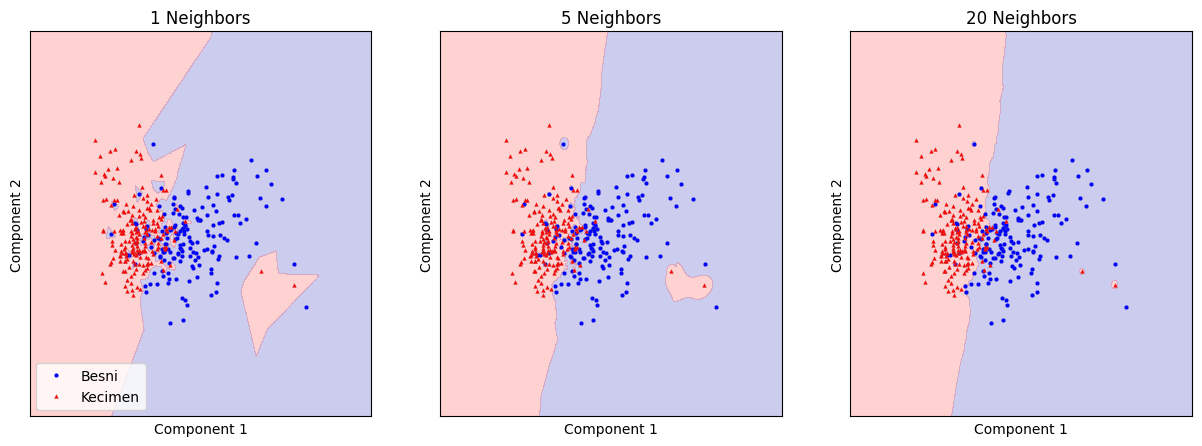

In [19]:
# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1,3,figsize=(15,5))

# 이웃 수 1, 5, 20에 따른 결정경계 시각화
for n_negibors, ax in zip([1,5,20], axes):
    k_num_model_eg = KNeighborsClassifier(n_neighbors=n_negibors, weights='distance').fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x, fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1], df_vsl_y, markeredgewidth=0.1, c=['b', 'r'], s=3, ax=ax)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title("{} Neighbors".format(n_negibors))

axes[0].legend(loc=3)

> 이웃 수가 적정하게 늘어나면 학습셋의 디테일한 분류는 힘들어지지만 범용적인 모델이 되어 테스트셋의 정확도를 높여주는 것이다.